# Use torch.distributions in all the below questions

## Imports

In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
import ipywidgets as widgets
from ipywidgets import interact
from torch.distributions import Categorical
from collections import Counter
import scipy.integrate as spi
import scipy.stats as stats
from scipy.stats import norm

# 1. **Random Variables**

#### Q1. (**Mandatory**)
Write a Python function that simulates rolling two six-sided dice and returns their sum. Use this function to perform 10,000 simulations. Calculate and print:

a) The experimental probability of rolling a sum of 7 <br/>
b) The experimental probability of rolling a sum of 2 or 12<br/>

Compare these experimental probabilities with the theoretical probabilities. What conclusions can you draw about the accuracy of the simulation?

In [3]:
die = Categorical(probs=torch.ones(6) / 6)

def roll_two_dice_torch(num_simulations=10000):
    die1 = die.sample((num_simulations,))
    die2 = die.sample((num_simulations,))
    sum = die1 + die2 + 2
    return sum

In [4]:
num_simulations = 10000
sum = roll_two_dice_torch(num_simulations)

In [5]:
theoretical_prob_7 = 6 / 36
prob_sum_7 = (sum == 7).sum().item() / num_simulations

print(f"Theoretical probability of rolling a sum of 7: {theoretical_prob_7:.4f}")
print(f"Experimental probability of rolling a sum of 7: {prob_sum_7:.4f}")

Theoretical probability of rolling a sum of 7: 0.1667
Experimental probability of rolling a sum of 7: 0.1660


In [6]:
theoretical_prob_2_or_12 = 1 / 36 + 1 / 36
prob_sum_2_or_12 = ((sum == 2) | (sum == 12)).sum().item() / num_simulations

print(f"Theoretical probability of rolling a sum of 2 or 12: {theoretical_prob_2_or_12:.4f}")
print(f"Experimental probability of rolling a sum of 2 or 12: {prob_sum_2_or_12:.4f}")

Theoretical probability of rolling a sum of 2 or 12: 0.0556
Experimental probability of rolling a sum of 2 or 12: 0.0552


The simulation is not 100% accurate as we are running the simulation for finite number of times. If number of simulations approaches infinity the theoretical probability will be equal to experimental probability.

#### Q2. (Optional)
Write a function coin_toss(n) that simulates flipping a coin n times, returning a list of 'H' (Heads) and 'T' (Tails). Then, write a function count_heads(flips) that takes the list of flips and returns the number of heads (this is your random variable, X). Finally, simulate 10 coin tosses and print the outcome of the coin tosses and the number of heads.

In [7]:
def coin_toss_bernoulli(n):
    toss = torch.distributions.Bernoulli(0.5)
    outcomes = toss.sample((n,))
    flips = ['H' if outcome.item() == 1 else 'T' for outcome in outcomes]
    return flips

In [8]:
def count_heads(flips):
    return flips.count('H')

In [9]:
n = 10 
flips = coin_toss_bernoulli(n)
num_heads = count_heads(flips)

print("Coin Toss Outcomes:", flips)
print("Number of Heads:", num_heads)

Coin Toss Outcomes: ['T', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H']
Number of Heads: 8


#### Q3. (Optional)
#### Coin Flip Simulation and Inverse Mapping Check

Using the `coin_toss(n)` and `count_heads(flips)` functions from Question 1, simulate **n = 4** coin flips.  

Then, given a value **a**, write a function `check_inverse_mapping(flips, a)` that checks whether the number of heads in the simulated coin flips equals **a**. In other words, verify if:  

$$
X(\xi) = a
$$

where:  
- **$X$** represents the function that counts the number of heads in the sequence.  
- **$\xi$** is the outcome of the 4 coin flips.  

The function should print whether **$X(\xi) = a$** is **True or False**.  
Finally, test the function with **a = 2**.  


In [125]:
def check_inverse_mapping(flips, a):
    heads_count = count_heads(flips)
    return heads_count == a

In [126]:
n = 4
flips = coin_toss_bernoulli(n)

print(f"Coin flips: {flips}")
print(f"Number of heads: {count_heads(flips)}")

Coin flips: ['T', 'T', 'H', 'H']
Number of heads: 2


In [12]:
a = 2
result = check_inverse_mapping(flips, a)
print(f"X(ξ) = {a} is {result}")

X(ξ) = 2 is False


# 2. **Probalility Mass function**

#### Q1. (**Mandatory**)
Consider a discrete random variable X with possible values {1, 2, 3, 4, 5}. You are given a function f(x) defined as:

$f(x) = c  (x^2 - 6x + 10)$ for x in {1, 2, 3, 4, 5}

where c is a constant.

Write a Python function is_valid_pmf(f) that:

* Determines if f(x) can be a valid PMF for some value of c.

* If valid, calculates and returns the value of c that makes f(x) a legitimate PMF.If not valid, returns None and prints why it's not valid.

Your function should check both properties of a valid PMF:

* Non-negativity for all x

* Sum of probabilities equals 1

Test your function with the given f(x) and explain your results.

In [13]:
def is_valid_pmf(x):
    unnormalized_probs = x**2 - 6*x + 10
    total_sum = torch.sum(unnormalized_probs).item()
    
    if total_sum <= 0:
        print("f(x) cannot be a valid PMF because the sum of probabilities is non-positive.")
        return None

    c = 1 / total_sum
    return c

In [14]:
x_values = torch.tensor([1, 2, 3, 4, 5])
c_value = is_valid_pmf(x_values)

print(f"f(x) is a valid PMF with c = {c_value}")

f(x) is a valid PMF with c = 0.06666666666666667


#### Q2. (Optional)
Simulate flipping a coin 100 times and calculate the empirical PMF for the number of heads (0 to 100).

In [15]:
num_simulations = 100000
num_flips = 100

results = np.random.binomial(num_flips, 0.5, num_simulations)
outcomes, counts = np.unique(results, return_counts=True)

empirical_pmf = counts / num_simulations

for outcome, prob in zip(outcomes, empirical_pmf):
    print(f'Heads: {outcome}, Probability: {prob:.4f}')

Heads: 27, Probability: 0.0000
Heads: 29, Probability: 0.0000
Heads: 30, Probability: 0.0000
Heads: 31, Probability: 0.0001
Heads: 32, Probability: 0.0002
Heads: 33, Probability: 0.0002
Heads: 34, Probability: 0.0005
Heads: 35, Probability: 0.0010
Heads: 36, Probability: 0.0015
Heads: 37, Probability: 0.0026
Heads: 38, Probability: 0.0042
Heads: 39, Probability: 0.0067
Heads: 40, Probability: 0.0105
Heads: 41, Probability: 0.0166
Heads: 42, Probability: 0.0216
Heads: 43, Probability: 0.0307
Heads: 44, Probability: 0.0385
Heads: 45, Probability: 0.0472
Heads: 46, Probability: 0.0577
Heads: 47, Probability: 0.0670
Heads: 48, Probability: 0.0728
Heads: 49, Probability: 0.0778
Heads: 50, Probability: 0.0799
Heads: 51, Probability: 0.0785
Heads: 52, Probability: 0.0732
Heads: 53, Probability: 0.0649
Heads: 54, Probability: 0.0582
Heads: 55, Probability: 0.0500
Heads: 56, Probability: 0.0398
Heads: 57, Probability: 0.0306
Heads: 58, Probability: 0.0227
Heads: 59, Probability: 0.0163
Heads: 6

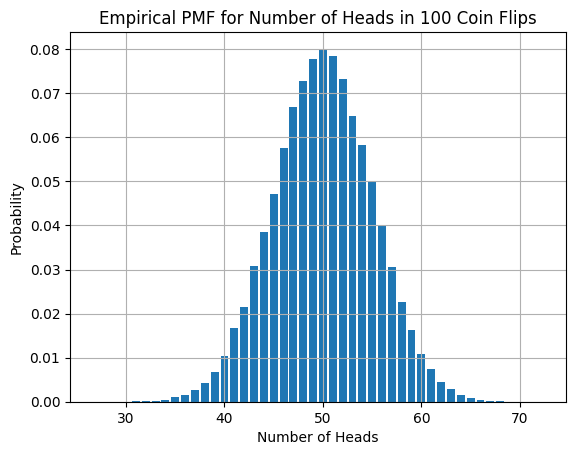

In [16]:
plt.bar(outcomes, empirical_pmf)
plt.title('Empirical PMF for Number of Heads in 100 Coin Flips')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

#### Q3. (Optional)

A small café records the number of customers visiting per day for a month (30 days). The recorded data is as follows:

    customer_counts = [12, 15, 14, 10, 18, 16, 14, 12, 15, 11, 17, 14, 13, 19, 12, 18, 14, 10, 16, 15, 14, 13, 17, 12, 18, 16, 14, 11, 19, 13]
Compute the PMF for the given data and plot it using Matplotlib. Identify the most common number of daily customers and compare the distribution.

In [17]:
customer_counts = [12, 15, 14, 10, 18, 16, 14, 12, 15, 11, 17, 14, 13, 19, 12, 18, 14, 10, 16, 15, 14, 13, 17, 12, 18, 16, 14, 11, 19, 13]
freq_counts = Counter(customer_counts)
total_days = 30

pmf = {key: value / total_days for key, value in freq_counts.items()}

print("PMF of Customer Counts:")
for count, prob in sorted(pmf.items()):
    print(f"Customers: {count}, Probability: {prob:.4f}")

PMF of Customer Counts:
Customers: 10, Probability: 0.0667
Customers: 11, Probability: 0.0667
Customers: 12, Probability: 0.1333
Customers: 13, Probability: 0.1000
Customers: 14, Probability: 0.2000
Customers: 15, Probability: 0.1000
Customers: 16, Probability: 0.1000
Customers: 17, Probability: 0.0667
Customers: 18, Probability: 0.1000
Customers: 19, Probability: 0.0667


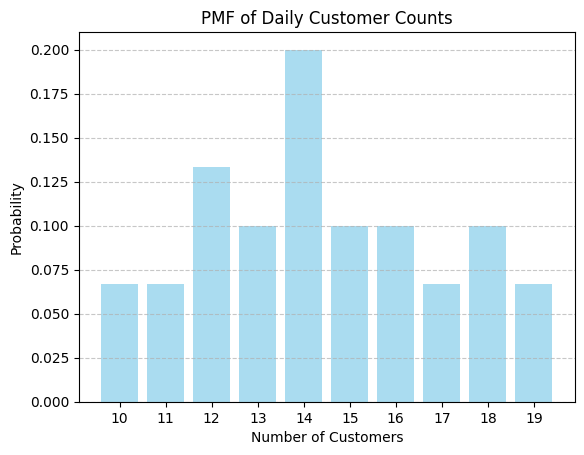

In [18]:
plt.bar(pmf.keys(), pmf.values(), color='skyblue', alpha=0.7)
plt.title('PMF of Daily Customer Counts')
plt.xlabel('Number of Customers')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(customer_counts), max(customer_counts) + 1))
plt.show()

In [19]:
most_common_count = max(pmf, key=pmf.get)
most_common_prob = pmf[most_common_count]

print(f"\nMost Common Number of Customers: {most_common_count}")
print(f"Probability of Most Common Count: {most_common_prob:.4f}")


Most Common Number of Customers: 14
Probability of Most Common Count: 0.2000


# 3. **Cumulative Distribution Function**

#### Q1. (**Mandatory**)

Consider a discrete random variable 𝑋 with possible values 𝑥={1,2,3,4,5} and corresponding probability mass function (PMF):
$$ P(X=x)= \frac{x}{15} ,x∈{1,2,3,4,5}$$

where
𝑃(𝑋=𝑥) represents the PMF of 𝑋.

The Cumulative Distribution Function (CDF) is defined as:
 $$F_X(x) = P(X≤x)=\sum_{k≤x}
 P(X=k)$$


Your Task:
1. Compute the PMF values for each 𝑥∈{1,2,3,4,5}.
2. Compute the CDF $𝐹_X(𝑥)$ for each 𝑥.
3. Verify the relationship between PMF and CDF:
- $ P(X=x)=F_X(x)−F_X(x−1) $ for all 𝑥≥2.
- For 𝑥=1, $𝑃(𝑋=1)=𝐹_𝑋(1)$.
4. Print and compare the computed PMF values with the differences in CDF values to confirm the relationship.

In [20]:
X = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
pmf = X / 15

for x, p in zip(X, pmf):
    print(f"P({int(x.item())}) = {p.item():.4f}")

P(1) = 0.0667
P(2) = 0.1333
P(3) = 0.2000
P(4) = 0.2667
P(5) = 0.3333


In [21]:
cdf = torch.cumsum(pmf, dim=0)

for x, f in zip(X, cdf):
    print(f"F_X({int(x.item())}) = {f.item():.4f}")

F_X(1) = 0.0667
F_X(2) = 0.2000
F_X(3) = 0.4000
F_X(4) = 0.6667
F_X(5) = 1.0000


In [22]:
pmf_from_cdf = torch.cat((cdf[:1], cdf[1:] - cdf[:-1]))

for x, p, pcdf in zip(X, pmf, pmf_from_cdf):
    print(f"P({int(x.item())}) = {p.item():.4f}, CDF Difference = {pcdf.item():.4f}")

P(1) = 0.0667, CDF Difference = 0.0667
P(2) = 0.1333, CDF Difference = 0.1333
P(3) = 0.2000, CDF Difference = 0.2000
P(4) = 0.2667, CDF Difference = 0.2667
P(5) = 0.3333, CDF Difference = 0.3333


#### Q2. (Optional)

  Write a Python function to compute the **CDF** for a given **discrete probability distribution**. Your function should:  

1. Take as input:  
   - A **list or NumPy array** of possible values of a discrete random variable.  
   - A corresponding **list or NumPy array** of probability mass function (PMF) values.  

2. Return:  
   - A list of CDF values corresponding to the input values.  

Additionally, perform the following:  

- Compute and plot the **CDF** for a **biased 6-sided die**, where the probability distribution is:  

| X   | 3   | 1   | 6   | 2   | 5   | 4   |
|-----|-----|-----|-----|-----|-----|-----|
| P(X)| 0.15| 0.05| 0.25| 0.10| 0.25| 0.20|


- Plot the **CDF as a step function** using **Matplotlib**.  

In [23]:
def compute_cdf(values, pmf):

    values = torch.tensor(values, dtype=torch.float32)
    pmf = torch.tensor(pmf, dtype=torch.float32)
    
    sorted_indices = torch.argsort(values)
    sorted_values = values[sorted_indices]
    sorted_pmf = pmf[sorted_indices]
    
    cdf = torch.cumsum(sorted_pmf, dim=0)
    return sorted_values, cdf

In [24]:
x = list(map(int, input().strip().split()))
pmf = list(map(float, input().strip().split()))

sorted_values, cdf = compute_cdf(x, pmf)

for val, cdf_val in zip(sorted_values, cdf):
    print(f"Value: {int(val.item())}, CDF: {cdf_val.item():.4f}")

Value: 1, CDF: 0.4000
Value: 2, CDF: 1.0000


In [25]:
x = [3, 1, 6, 2, 5, 4]
pmf = [0.15, 0.05, 0.25, 0.10, 0.25, 0.20]

sorted_values, cdf = compute_cdf(x, pmf)

for val, cdf_val in zip(sorted_values, cdf):
    print(f"Value: {int(val.item())}, CDF: {cdf_val.item():.4f}")

Value: 1, CDF: 0.0500
Value: 2, CDF: 0.1500
Value: 3, CDF: 0.3000
Value: 4, CDF: 0.5000
Value: 5, CDF: 0.7500
Value: 6, CDF: 1.0000


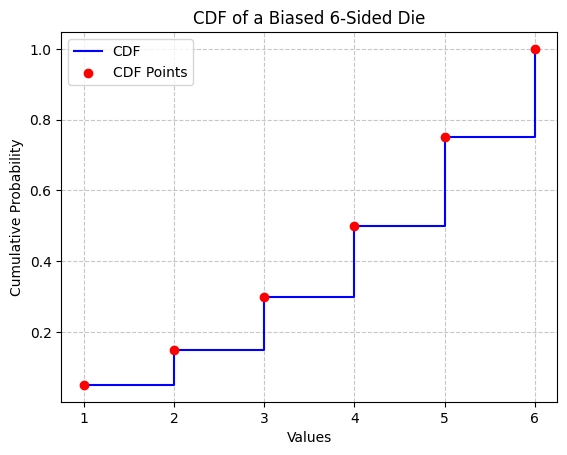

In [26]:
plt.step(sorted_values.numpy(), cdf.numpy(), where='post', label='CDF', color='blue')
plt.scatter(sorted_values.numpy(), cdf.numpy(), color='red', zorder=5, label='CDF Points')
plt.title('CDF of a Biased 6-Sided Die')
plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

#### Q3. (Optional)

Define a function pdf(x) representing a normal distribution.

$$
f(x) = \frac{1}{2\pi\sigma^2} e^{-\frac{(x-\mu)^2}{2\sigma ^2}}
$$

Now calcluate the CDF of this function and plot it along with the curve for the above normal distribution.

In [27]:
mean = torch.tensor(0.0)
std_dev = torch.tensor(1.0)

x = torch.linspace(-4, 4, 500)
pdf = (1 / (torch.sqrt(torch.tensor(2.0 * torch.pi)) * std_dev)) * torch.exp(-0.5 * ((x - mean) / std_dev)**2)

cdf = torch.cumsum(pdf, dim=0) * (x[1] - x[0])

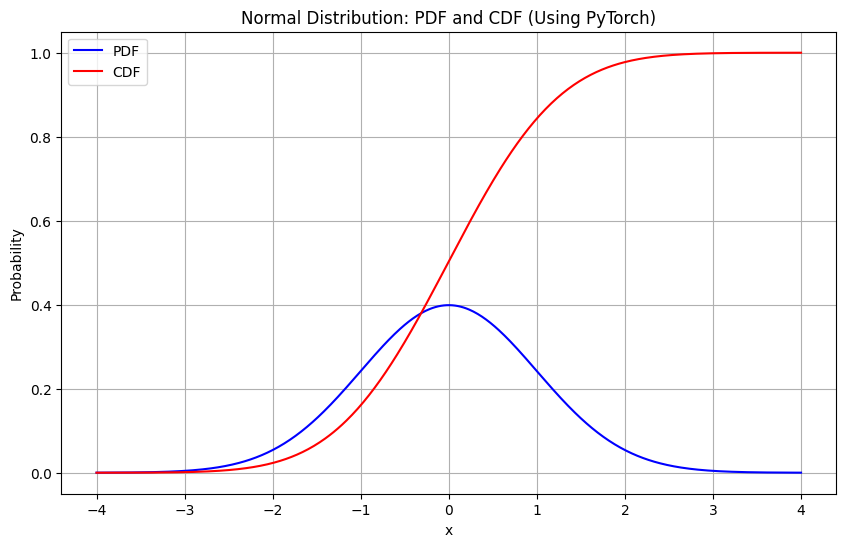

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), pdf.numpy(), label='PDF', color='blue')
plt.plot(x.numpy(), cdf.numpy(), label='CDF', color='red')

plt.title('Normal Distribution: PDF and CDF (Using PyTorch)')
plt.xlabel('x')
plt.ylabel('Probability')

plt.legend()
plt.grid()
plt.show()

# 4. **Expectation**

#### Q1. (**Mandatory**)
Simulate a game where you flip a coin three times. The reward system is as follows:


*   $8 for exactly 3 heads

*   $1 for exactly 2 heads,

*   $0 otherwise.

The cost to play the game is $1.5. Run the simulation for 10,000 trials and compute the average net gain, compare with theoretical expected net gain?


In [29]:
trials = 10000
cost = 1.5
rewards = torch.tensor([0, 0, 1, 8])

probabilities = torch.tensor([1/8, 3/8, 3/8, 1/8])
expected_reward = torch.dot(probabilities, rewards.float()).item()
expected_net_gain = expected_reward - cost 

print("Theoretical: Expected Net Gain:", expected_net_gain)

Theoretical: Expected Net Gain: -0.125


In [30]:
toss = torch.distributions.Bernoulli(0.5)
flips = toss.sample((trials, 3))
num_heads = flips.sum(dim=1).int()

trial_rewards = rewards[num_heads]
net_gains = trial_rewards - cost

average_net_gain = net_gains.mean().item()

print("Simulation: Average Net Gain:", average_net_gain)


Simulation: Average Net Gain: -0.16300000250339508


The simulation average net gain is not equal to theoretical net gain. It will be same if we increase the number of trails.

#### Q2. (Optional)
Write a Python function that computes the expected value of a discrete random variable given its probability mass function (PMF). The function should take a dictionary where keys represent outcomes and values represent their corresponding probabilities.

Example:
```python
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
expected_value = compute_expected_value(pmf)
print(expected_value)  # Expected Output: 2.3

```

In [31]:
def compute_expected_value(pmf):
  
  keys = torch.tensor(list(pmf.keys()))
  probabilities = torch.tensor(list(pmf.values()))

  expected_value = torch.sum(keys * probabilities)
  return expected_value

In [32]:
pmf = {1: 0.2, 2: 0.3, 3: 0.5}

expected_value = compute_expected_value(pmf)
expected_value = expected_value.item()

print(expected_value)

2.299999952316284


#### Q3. (Optional)

Given a discrete random variable with its probability mass function (PMF), compute the expected value of a function \(g(x)\). The function \(g(x)\) should be provided as input.

Example:
```python
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
g = lambda x: x**2
expected_value = compute_expected_value_of_function(pmf, g)
print(expected_value)

In [33]:
def compute_expected_value_of_function(pmf, g):

    keys = torch.tensor(list(pmf.keys()))
    probabilities = torch.tensor(list(pmf.values()))

    g_values = g(keys)
    expected_value = torch.sum(g(keys) * probabilities)
    
    return expected_value

In [34]:
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
g = lambda x: x**2

expected_value = compute_expected_value_of_function(pmf, g)
print(expected_value.item())

5.900000095367432


# 5. **Moments and Variance**

#### Q1. (**Mandatory**)
Write a function to compute the variance of a discrete random variable given its probability mass function.

Example:
```python
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
variance = compute_variance(pmf)
print(variance)


In [35]:
def compute_variance(pmf):

    keys = torch.tensor(list(pmf.keys()), dtype=torch.float)
    probabilities = torch.tensor(list(pmf.values()))

    expected_value = torch.sum(keys * probabilities)
    variance = torch.sum(((keys - expected_value) ** 2) * probabilities)
    
    return variance

In [36]:
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
variance = compute_variance(pmf)

print("Variance:", variance.item())

Variance: 0.6100000143051147


#### Q2. (Optional)
Write a function to compute the k-th moment of a discrete random variable given its probability mass function.

Example:
```python
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
k = 3
moment = compute_moment(pmf, k)
print(moment)


In [37]:
def compute_moment(pmf, k):

    keys = torch.tensor(list(pmf.keys()), dtype=torch.float)
    probabilities = torch.tensor(list(pmf.values()))
    
    moment = torch.sum((keys ** k) * probabilities)
    return moment

In [38]:
pmf = {1: 0.2, 2: 0.3, 3: 0.5}
k = 3

moment = compute_moment(pmf, k)
print(moment.item())

16.100000381469727


#### Q3. (Optional)
Simulate and Estimate the variance of a given function \( f(x) \) when \( X \) is uniformly distributed over [a, b].

Example:
```python
import numpy as np
f = lambda x: x**2
a, b, N = 0, 1, 10000
variance = estimate_variance(f, a, b, N)
print(variance)

In [39]:
def estimate_variance(f, a, b, N):
    X = torch.distributions.Uniform(a, b).sample((N, ))
    Y = f(X)

    mean = torch.mean(Y)
    moment_2 = torch.mean(Y**2)

    variance = moment_2 - mean**2
    return variance

In [40]:
f = lambda x: x**2
a, b, N = 0, 1, 10000

variance = estimate_variance(f, a, b, N)
print("Estimated Variance:", variance)

Estimated Variance: tensor(0.0898)


# 6. **Bernoulli Random Variables**

#### Q1. (**Mandatory**)
Write a function that simulates a Bernoulli-distributed random variable with a given probability \( p \).

Example:
```python
p = 0.7
outcome = bernoulli_trial(p)
print(outcome)  # Expected Output: 0 or 1

In [41]:
def bernoulli_trial(p):
    probs = torch.tensor([p], dtype=torch.float32)
    outcome = torch.bernoulli(probs).item()
    return outcome

In [42]:
p = 0.7
outcome = bernoulli_trial(p)
print("Outcome:", outcome)

Outcome: 1.0


#### Q2. (Optional)
Given \( p \), the probability of success in a Bernoulli distribution, compute its expectation and variance.

Example:
```python
p = 0.5
expectation, variance = bernoulli_stats(p)
print(expectation, variance)

In [43]:
def bernoulli_stats(p):
    probs = torch.tensor(p, dtype=torch.float32)
    expectation = probs
    variance = probs * (1 - probs)

    return expectation, variance

In [44]:
p = 0.5
expectation, variance = bernoulli_stats(p)
print(expectation, variance)

tensor(0.5000) tensor(0.2500)


#### Q3. (Optional)
Write a function that simulates `N` Bernoulli trials and computes the proportion of successes.

Example:
```python
p = 0.3
N = 1000
proportion = simulate_bernoulli(p, N)
print(proportion)

In [45]:
def simulate_bernoulli(p, N):
    probs = torch.full((N,), p, dtype=torch.float32)
    outcomes = torch.bernoulli(probs)

    proportion_of_success = outcomes.mean().item()
    return proportion_of_success

In [46]:
p = 0.3
N = 1000
proportion = simulate_bernoulli(p, N)
print("Proportion of successes:", proportion)

Proportion of successes: 0.3149999976158142


# 7. **Binomial Distribution**

#### Q1. (**Mandatory**)
Write a Python function that simulates a Binomial random variable. The function should take three inputs:
- `n` (number of trials)
- `p` (probability of success)
- `size` (number of random values to generate)

Plot a histogram of the generated values for `n=10`, `p=0.5`, and `size=1000`.


In [47]:
def simulate_binomial(n, p, size):
    binomial_dist = torch.distributions.Binomial(n, p).sample((size,))
    return binomial_dist

In [48]:
n = 10
p = 0.5
size = 1000

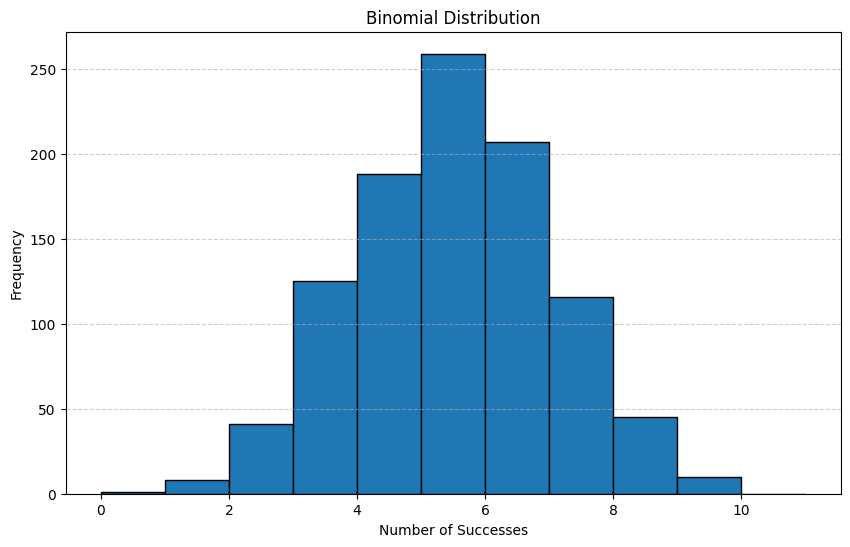

In [49]:
values = simulate_binomial(n, p, size)

plt.figure(figsize=(10, 6))
plt.hist(values.numpy(), bins=range(n + 2), edgecolor='black')

plt.title(f'Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Q2. (Optional)
Write a Python program that:
1. Computes the probability mass function (PMF) of a Binomial distribution.
2. Plots the PMF for `n=20` and `p=0.3`.

In [50]:
def binomial_pmf(n, p):
    binomial_dist = torch.distributions.Binomial(n, p)
    x = torch.arange(n + 1, dtype=torch.float32)
    pmf = (binomial_dist.log_prob(x)).exp()
    return x, pmf

In [51]:
n = 20
p = 0.3

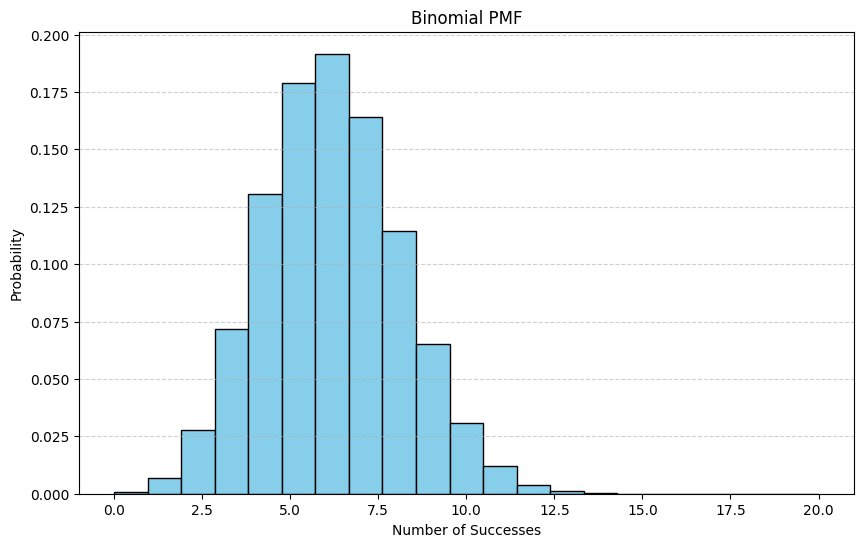

In [52]:
x, pmf = binomial_pmf(n, p)

plt.figure(figsize=(10, 6))
plt.hist(x.numpy(), bins=len(x), weights=pmf.numpy(), color='skyblue', edgecolor='black')

plt.title(f'Binomial PMF')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Q3. (Optional)
Simulate a fair coin being flipped 100 times and count the number of heads. Repeat this experiment 1000 times and visualize the distribution using a histogram. Explain how this relates to the Binomial distribution.

In [53]:
def simulate_toss(n, p, num_experiments):
    binom_dist = torch.distributions.Binomial(n, p)

    results = binom_dist.sample((num_experiments,))
    return results

In [54]:
n = 100
p = 0.5
num_experiments = 1000

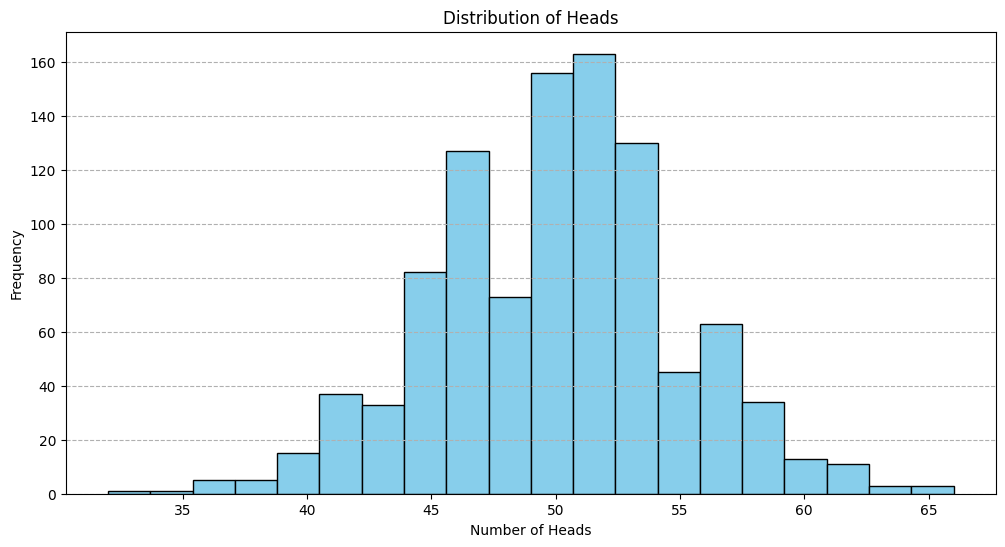

In [55]:
results = simulate_toss(n, p, num_experiments)

plt.figure(figsize=(12, 6))
plt.hist(results.numpy(), bins=20, color='skyblue', edgecolor='black')

plt.title(f'Distribution of Heads')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--')
plt.show()

This experiment models a Binomial distribution because:
* Each coin flip is a Bernoulli trial (two possible outcomes: heads or tails).
* The total number of heads after 100 flips follows the Binomial distribution Binomial( 𝑛 = 100, 𝑝 = 0.5 )

# 8. **Geometric Distribution**

#### Q1. (**Mandatory**)
#### Simulating Geometric Distribution
Write a Python function that generates random numbers from a Geometric distribution. The function should take:
- `p` (probability of success)
- `size` (number of values to generate)

Plot a histogram for `p=0.3` and `size=1000`.

In [56]:
def simulate_geometric(p, size):
    dist = torch.distributions.Geometric(p).sample((size,))
    return dist

In [57]:
p = 0.3
size = 100000

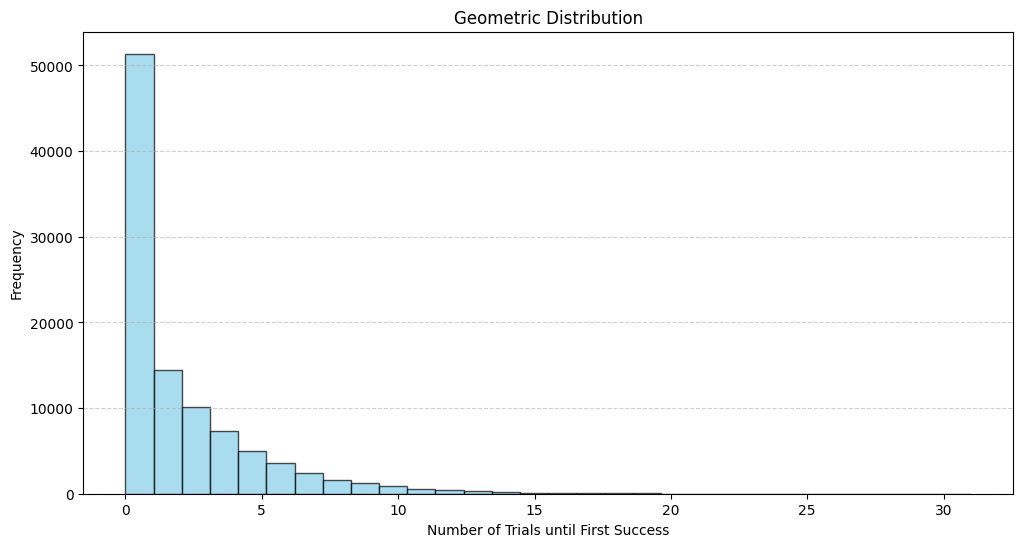

In [58]:
samples = simulate_geometric(p, size)

plt.figure(figsize=(12, 6))
plt.hist(samples.numpy(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Geometric Distribution')
plt.xlabel('Number of Trials until First Success')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Q2. (Optional)
#### Expected Number of Trials
Create an interactive Python program that uses `ipywidgets` and `matplotlib` to visualize the probability mass function (PMF) of the Geometric distribution. Users can adjust the probability of success \( p \) and the maximum number of trials \( k \) to display.

In [59]:
def geometric_pmf(p, k):
    x = torch.arange(1, k + 1, dtype=torch.float32)
    geom_dist = torch.distributions.Geometric(probs=p)

    pmf = geom_dist.log_prob(x - 1).exp()
    return x, pmf

In [60]:
def plot_geometric(p, k):
    x, pmf = geometric_pmf(p, k)
    
    plt.figure(figsize=(12, 6))
    plt.bar(x.numpy(), pmf.numpy(), color='skyblue', edgecolor='black', alpha=0.7)

    plt.title(f'Geometric PMF')
    plt.xlabel('Number of Trials until First Success')
    plt.ylabel('Probability')
    
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

In [61]:
interact(
    plot_geometric, 
    p=widgets.FloatSlider(min=0.01, max=1.0, step=0.01, value=0.3, description='Success Probability (p)'),
    k=widgets.IntSlider(min=10, max=100, step=5, value=30, description='Max Trials (k)')
)

interactive(children=(FloatSlider(value=0.3, description='Success Probability (p)', max=1.0, min=0.01, step=0.…

<function __main__.plot_geometric(p, k)>

#### Q3. (Optional)
#### Estimating `p` from Sample Data
Generate a dataset of 500 Geometric random variables with `p=0.4`. Then, estimate `p` from the data using the formula:

$$\hat{p} = \frac{1}{\text{sample mean}}$$

Compare the estimated value with the true `p=0.4` and compute the percentage error.

In [62]:
p = 0.4
size = 100000
data = torch.distributions.Geometric(torch.tensor(p)).sample((size,))

p_estimated = 1 / data.mean()
percentage_error = abs((p_estimated - p) / p) * 100

print(f"Estimated p: {p_estimated:.5f}")
print(f"Percentage Error: {percentage_error:.2f}%")

Estimated p: 0.66744
Percentage Error: 66.86%


# 9. **Poisson Distribution**

#### Q1. (**Mandatory**)
Write a Python function that generates Poisson random variables. The function should take:
- `λ` (expected number of events per interval)
- `size` (number of values to generate)

Plot a histogram for `λ=5` and `size=1000`.

In [63]:
def dist_poisson(lambda_, size):
    dist = torch.poisson(torch.full((size,), lambda_, dtype=torch.float))
    return dist

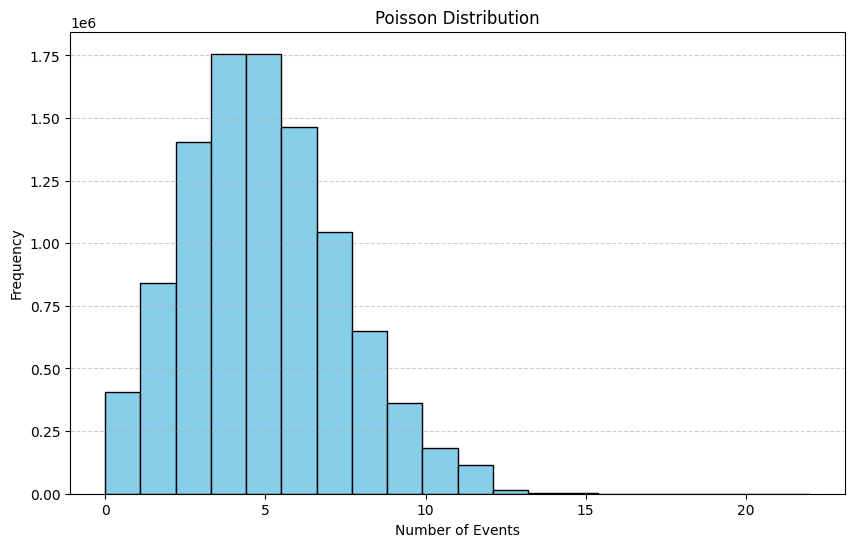

In [64]:
lambda_ = 5
size = 10000000
dist = dist_poisson(lambda_, size).numpy()

plt.figure(figsize=(10, 6))
plt.hist(dist, bins=20, color='skyblue', edgecolor='black')

plt.title('Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Q2. (Optional)
Generate 1000 samples from a Binomial distribution with `n=100` and `p=0.05`. Then, generate 1000 samples from a Poisson distribution with `λ=n*p=5`. Compare their histograms and explain why the Poisson distribution approximates the Binomial distribution for large `n` and small `p`.

In [65]:
n = 100
p = 0.05
lambda_ = n * p

binomial_data = torch.distributions.Binomial(n, torch.tensor([p], dtype=torch.float)).sample((10000000,))
poisson_data = torch.poisson(torch.full((10000000,), lambda_, dtype=torch.float))

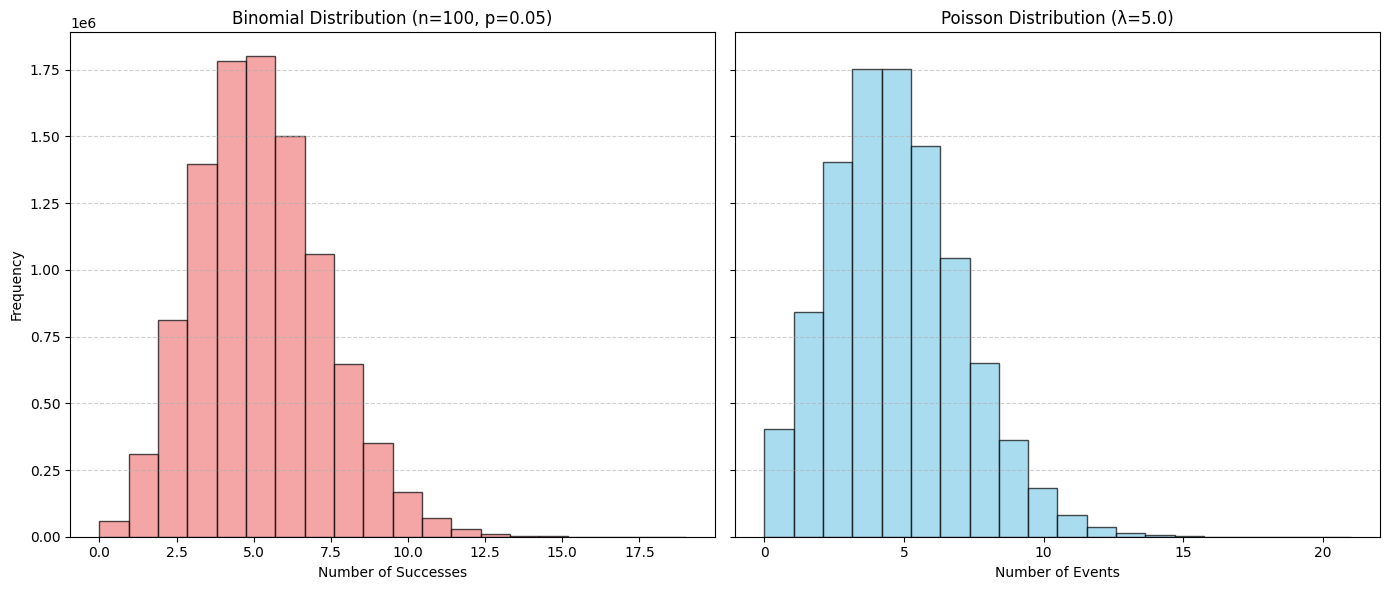

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axs[0].hist(binomial_data, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axs[0].set_title(f'Binomial Distribution (n={n}, p={p})')
axs[0].set_xlabel('Number of Successes')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

axs[1].hist(poisson_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axs[1].set_title(f'Poisson Distribution (λ={lambda_})')
axs[1].set_xlabel('Number of Events')
axs[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

The histograms reveal that the Poisson distribution closely approximates the Binomial distribution when: 
* n is large 
* p is small

This is due to the Poisson limit theorem, which states:

##### **Binomial (𝑛, 𝑝) ≈ Poisson (𝜆) when 𝑛 → ∞ and 𝑝 → 0 , with 𝑛 × 𝑝 = 𝜆**

#### Q3. (Optional)
A call center receives calls at an average rate of 3 calls per minute. Assume the number of calls follows a Poisson distribution.
1. Compute the probability of receiving exactly 5 calls in a minute.
2. Compute the probability of receiving at most 5 calls.

In [67]:
lambda_ = torch.tensor(3.0)         # Average rate of calls per minute
k = 5                               # Number of calls

prob_exact_5 = (torch.exp(-lambda_) * lambda_**k) / math.factorial(k)
print(f"Probability of exactly 5 calls: {prob_exact_5:.4f}")

Probability of exactly 5 calls: 0.1008


In [68]:
k_values = torch.arange(0, k + 1)
factorials = torch.tensor([math.factorial(int(i)) for i in k_values], dtype=torch.float)
prob_at_most_5 = torch.sum(torch.exp(-lambda_) * (lambda_ ** k_values) / factorials)

print(f"Probability of at most 5 calls: {prob_at_most_5:.4f}")

Probability of at most 5 calls: 0.9161


# 10. **Probability Density function**

#### Q1. (**Mandatory**)
Implement a piecewise PDF defined as:

$$
f(x) =
\begin{cases}
0.5x & \text{if } 0 \leq x \leq 1 \\
2 - x & \text{if } 1 < x \leq 2 \\
0 & \text{otherwise}
\end{cases}
$$

Compute P(0.5≤X≤1.5) analytically and verify using numerical integration.

Plot the PDF and highlight the area under the curve for the computed probability.

In [69]:
def pdf(x):
    return np.where(
        (0 <= x) & (x <= 1), 0.5 * x,
        np.where((1 < x) & (x <= 2), 2 - x, 0)
    )

In [70]:
p_analytical = (
    (0.5 * 1**2 / 2) - (0.5 * 0.5**2 / 2) +  
    (2*1.5 - 1.5**2 / 2) - (2*1 - 1**2 / 2)
)
print(f"Analytical P(0.5 ≤ X ≤ 1.5): {p_analytical:.4f}")

Analytical P(0.5 ≤ X ≤ 1.5): 0.5625


In [71]:
p_numerical, _= spi.quad(pdf, 0.5, 1.5)
print(f"Numerical P(0.5 ≤ X ≤ 1.5): {p_numerical:.4f}")

Numerical P(0.5 ≤ X ≤ 1.5): 0.5625


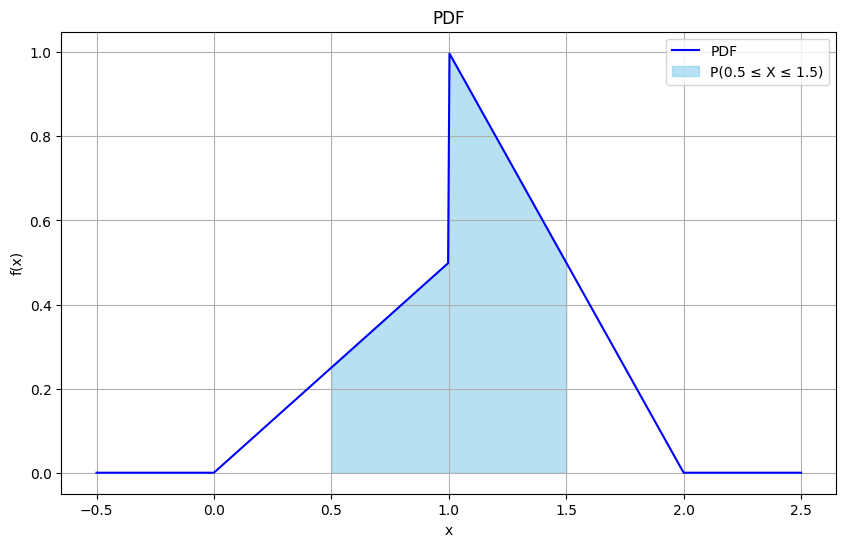

In [72]:
x = np.linspace(-0.5, 2.5, 500)
y = pdf(x)

x_fill = np.linspace(0.5, 1.5, 500)
y_fill = pdf(x_fill)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='PDF', color='blue')
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.6, label='P(0.5 ≤ X ≤ 1.5)')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('PDF')

plt.legend()
plt.grid(True)
plt.show()

#### Q2. (Optional)
Write a Python program to estimate the probability density function of a given dataset using a histogram.

* Generate or load a dataset (e.g., from a normal distribution with mean = 0 and standard deviation = 1, sample size = 1000).
* Compute the histogram with an appropriate number of bins.
* Normalize the histogram so that it represents a probability density function and plot the estimated PDF.

In [73]:
mean = 0
std_dev = 1
dist = torch.normal(mean, std_dev, size=(1000000,))

bins = 30
hist, bin_edges = torch.histogram(dist, bins)
bin_width = bin_edges[1] - bin_edges[0]

pdf = hist / (torch.sum(hist) * bin_width)

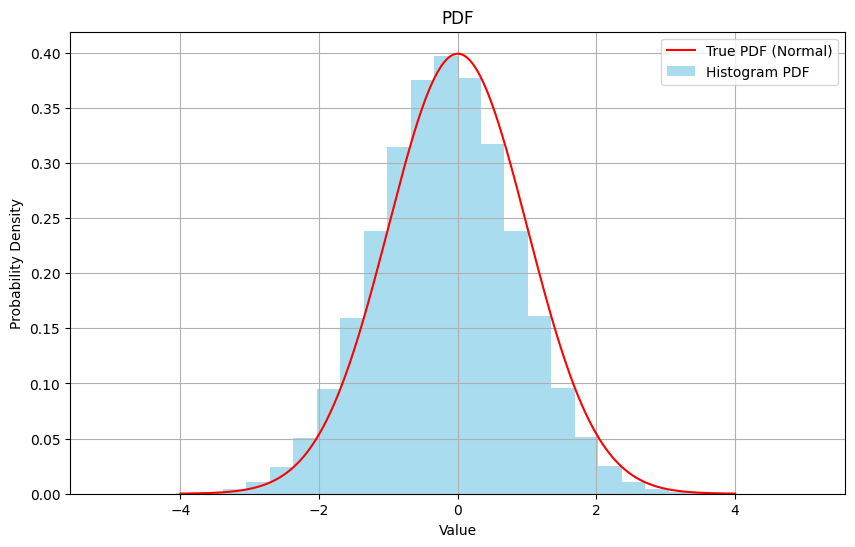

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1].numpy(), pdf.numpy(), width=bin_width.item(), color='skyblue', alpha=0.7, label='Histogram PDF')

x = torch.linspace(-4, 4, 1000)
true_pdf = (1 / (std_dev * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - mean) / std_dev)**2)

plt.plot(x.numpy(), true_pdf.numpy(), color='red', label='True PDF (Normal)')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDF')

plt.legend()
plt.grid(True)
plt.show()

#### Q3. (Optional)
Random variable X defined as:

Discrete PMF: P(X=0)=0.2.

Continuous PDF: For 1≤x≤3, f(x)=0.4.

X is undefined outside {0}∪[1,3].

* a) Confirm the total probability is 1.
* b) Compute P(1.5≤X≤2.5).

In [75]:
x = torch.linspace(-1, 4, 1000)

pdf = torch.where(x == 0, torch.tensor(0.2), 0.0)
pdf += torch.where((x >= 1) & (x <= 3), 0.4, 0.0)

continuous_prob = torch.trapz(pdf[(x >= 1) & (x <= 3)], x[(x >= 1) & (x <= 3)])
total_prob = continuous_prob + 0.2

print(f"Total Probability: {total_prob:.2f}")

Total Probability: 1.00


In [76]:
mask = (x >= 1.5) & (x <= 2.5)
p_1_5_to_2_5 = torch.trapz(pdf[mask], x[mask])

print(f"P(1.5 ≤ X ≤ 2.5): {p_1_5_to_2_5:.2f}")

P(1.5 ≤ X ≤ 2.5): 0.40


# 11. **Expectation(continuous)**

#### Q1. (**Mandatory**)
Implement a function to compute E[X] for a continuous random variable with a piecewise probability density function (PDF).

```python
def expectation_piecewise_pdf(intervals: list, funcs: list) -> float:
    """
    Compute E[X] for a piecewise PDF defined over intervals.
    
    Args:
        intervals: List of tuples defining intervals, e.g., [(0, 1), (1, 2)]
        funcs: List of functions corresponding to each interval's PDF
    """
    
    # Example:
    def f1(x): return x   # For 0 <= x <= 1
    def f2(x): return 2 - x  # For 1 < x <= 2
    expectation_piecewise_pdf([(0, 1), (1, 2)], [f1, f2]) ≈ 1.0 

In [77]:
def expectation_piecewise_pdf(intervals: list, funcs: list) -> float:
  expectation = 0
  for i in range(len(intervals)):
    a, b = intervals[i]
    func = funcs[i]

    integral, i = spi.quad(lambda x: x * func(x), a, b)
    expectation += integral

  return expectation

In [78]:
def f1(x): return x
def f2(x): return 2 - x

expectation = expectation_piecewise_pdf([(0, 1), (1, 2)], [f1, f2])
print("E[X]:", expectation)

E[X]: 1.0


#### Q2. (Optional)
Compute E[g(X)] for a continuous random variable X with PDF f(x) and transformation g, using numerical integration.
```python
def expectation_transform(g, pdf, lower: float, upper: float) -> float:
    """
    Compute E[g(X)] where X has the given PDF.
    
    Args:
        g: Function to transform X (e.g., lambda x: x**2)
        pdf: Probability density function of X
        lower: Lower bound of X's support
        upper: Upper bound of X's support
    """
    # Example:
    f = lambda x: 2*x  # PDF for X ~ Uniform(0,1) transformed by Y=2X
    expectation_transform(lambda x: x, f, 0, 1) ≈ 2/3

In [79]:
def expectation_transform(g, pdf, lower: float, upper: float) -> float:
  integral, i = spi.quad(lambda x: g(x) * pdf(x), lower, upper)
  return integral

In [80]:
f = lambda x: 2*x
expectation = expectation_transform(lambda x: x, f, 0, 1)
print("E[g(X)]: ", expectation)

E[g(X)]:  0.6666666666666667


# **12. Cumulative distribution function for continuous random variables**

#### Q1. (**Mandatory**)
Write a function to compute and plot the Cumulative Distribution Function (CDF) for a Uniform continuous random variable
𝑋 ∼ 𝑈(𝑎,𝑏) given the probability density function (PDF):


$$ f_X(x)= \begin{cases}
\frac{1}{b−a} & ,\text a≤x≤b \\
0 & ,\text {otherwise}
\end {cases}
$$

Your function should:

1. Take a and b (where 𝑎 < 𝑏) as inputs.
2. Compute the CDF $𝐹_𝑋(𝑥)$
3. Generate an array of 𝑥-values and compute $ 𝐹_𝑋(𝑥) $.
4. Plot the CDF curve using Matplotlib.​

In [81]:
def find_cdf(a, b):
    uniform_dist = torch.distributions.Uniform(a, b)
    x = torch.linspace(a - 1, b + 1, 1000)
    
    cdf = torch.zeros_like(x)
    cdf[x < a] = 0.0
    cdf[x > b] = 1.0

    mask = (x >= a) & (x <= b)
    cdf[mask] = uniform_dist.cdf(x[mask])
    return x, cdf

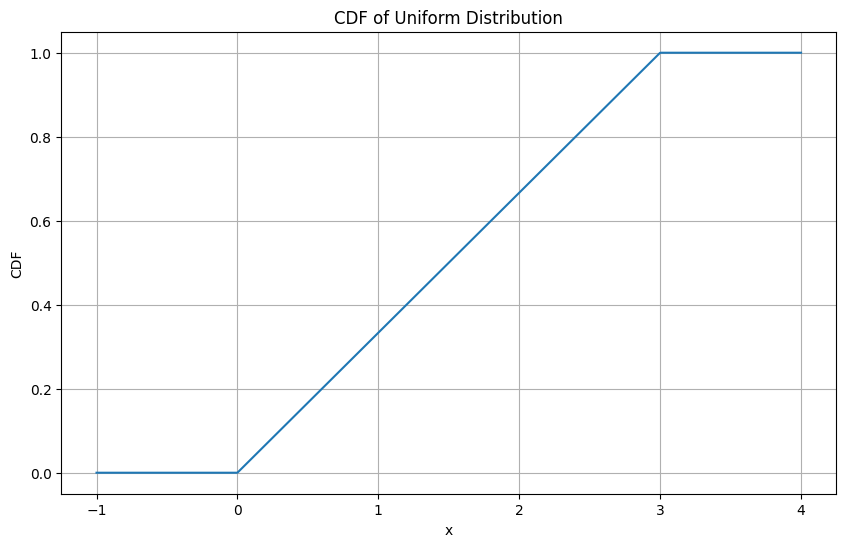

In [82]:
a, b = map(int, input().split())
x, cdf = find_cdf(a, b)

plt.figure(figsize=(10, 6))
plt.plot(x, cdf)

plt.title('CDF of Uniform Distribution')
plt.xlabel('x')
plt.ylabel('CDF')

plt.grid(True)
plt.show()

#### Q2. (Optional)
A continuous random variable 𝑋 follows an Exponential distribution with a given rate parameter 𝜆. The probability density function (PDF) of 𝑋 is:
    $$ f_X(x)=λe^{−λx} ,x≥0 $$

Your task is to derive and compute the CDF $𝐹_𝑋(𝑥)$ of the given exponential distribution for a given 𝜆.

Instructions:
1. Write a function that takes 𝑥 and 𝜆 as input and returns the cumulative distribution function (CDF) $ 𝐹_𝑋(𝑥)$.
2. Compute the CDF for different values of 𝑥 in the range [0, 5].
3. Plot the CDF curve for a given 𝜆.

In [83]:
def exponential_cdf(x, lambd):
    exp_dist = torch.distributions.Exponential(lambd)
    return exp_dist.cdf(x)

In [84]:
lambda_ = 1.5
x_values = torch.linspace(0, 5, 1000)

cdf_values = exponential_cdf(x_values, lambda_)

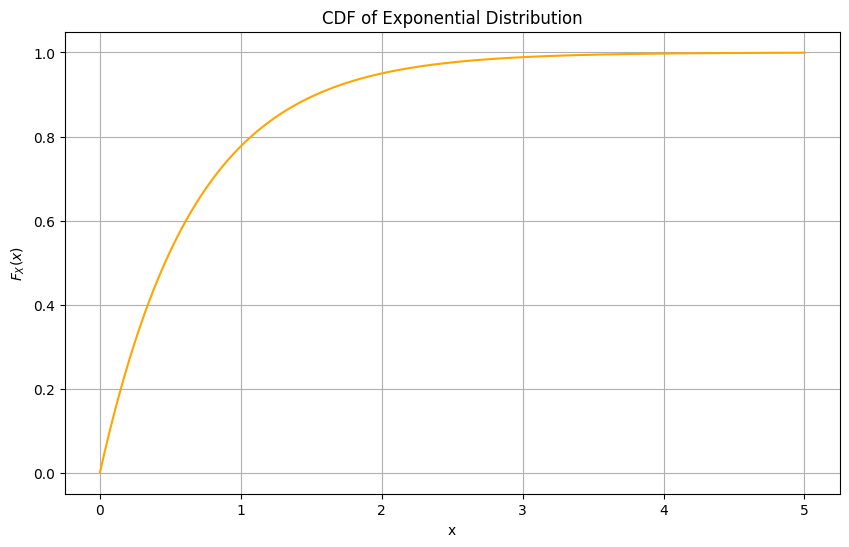

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, cdf_values, color='orange')

plt.title('CDF of Exponential Distribution')
plt.xlabel('x')
plt.ylabel(r'$F_X(x)$')

plt.grid(True)
plt.show()

#### Q3. (Optional)
A continuous random variable 𝑋 follows an Exponential distribution with a rate parameter 𝜆. The PDF of 𝑋 is given as:
$$ 𝑓_𝑋(𝑥)=𝜆𝑒^{−𝜆𝑥},𝑥≥0 $$

Your task is to compute the probability 𝑃(1≤𝑋≤3) using two different approaches:

(a) PDF Approach:
Compute the probability using numerical integration of the PDF over the interval [1,3].

(b) CDF Approach:
Compute the probability using the CDF formula.

In [86]:
def exponential_pdf(x, lambd):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    exp_dist = torch.distributions.Exponential(lambd)

    return torch.exp(exp_dist.log_prob(x_tensor)).numpy()

In [87]:
lambda_ = 1.5
result = spi.quad(exponential_pdf, 1, 3, args=(lambda_))[0]

print(f"Probability using PDF (SciPy Integration): {result:.4f}")

Probability using PDF (SciPy Integration): 0.2120


In [88]:
exp_dist = torch.distributions.Exponential(lambda_)
prob_cdf = (exp_dist.cdf(torch.tensor(3.0)) - exp_dist.cdf(torch.tensor(1.0))).item()

print(f"Probability using CDF: {prob_cdf:.4f}")

Probability using CDF: 0.2120



# 13. **Mean, Mode, and Median**  
*(Refer to https://probability4datascience.com/slides/Slide_4_04.pdf)*



#### Q1. (Optional)
#### Compute Summary Statistics:
   Using a numerical dataset, write a Python snippet to compute the mean, median, and mode using built-in libraries.  

In [89]:
data = np.random.randint(1, 50, size=1000)

mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data, keepdims=True).mode[0]

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")

Mean: 25.00
Median: 25.00
Mode: 12.00


#### Q2. (**Mandatory**)
#### Visualize Distribution with Markers:  
   Generate a sample (e.g., from a normal distribution) and plot its histogram. Then mark the mean (red), median (green), and an approximate mode (blue, as the bin with maximum count) on the plot.

In [90]:
dist = torch.normal(50.0, 10.0, (1000,))

mean = torch.mean(dist).item()
median = torch.median(dist).item()

hist, bin_edges_torch = torch.histogram(dist, bins=30)
mode = bin_edges_torch[torch.argmax(hist)].item()

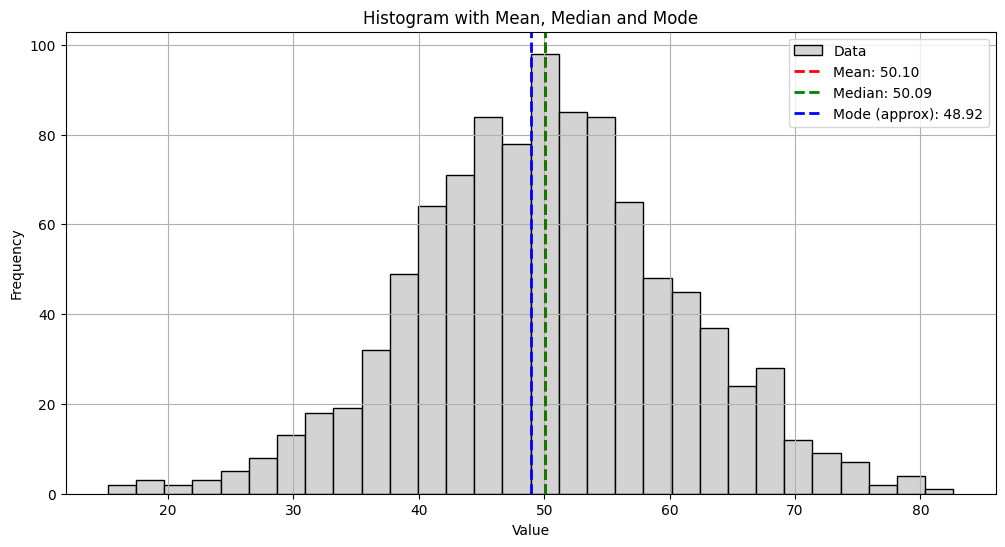

In [91]:
plt.figure(figsize=(12, 6))
plt.hist(dist, bins=30, color='lightgray', edgecolor='black', label='Data')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mode, color='blue', linestyle='dashed', linewidth=2, label=f'Mode (approx): {mode:.2f}')

plt.title('Histogram with Mean, Median and Mode')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.grid(True)
plt.show()

### Q3. (Optional)
#### Sample vs. Theoretical Comparison:
   Generate 1000 samples from a known distribution (e.g., Uniform over [0, 10]) and compute the sample mean, median, and mode. Compare these with the theoretical values (mean = 5, median = 5).

In [92]:
dist = torch.distributions.Uniform(0.0, 10.0).sample((1000,))

mean= torch.mean(dist).item()
median = torch.median(dist).item()

hist, bin_edges = torch.histogram(dist, bins=30)
mode = bin_edges[torch.argmax(hist)].item()

theoretical_mean = 5
theoretical_median = 5

print(f"Sample Mean: {mean:.2f}, Theoretical Mean: {theoretical_mean:.2f}")
print(f"Sample Median: {median:.2f}, Theoretical Median: {theoretical_median:.2f}")
print(f"Sample Mode (approx): {mode:.2f}")

Sample Mean: 4.98, Theoretical Mean: 5.00
Sample Median: 4.78, Theoretical Median: 5.00
Sample Mode (approx): 4.00


# 14. **Uniform Random Variables**  
*(Refer to https://probability4datascience.com/slides/Slide_4_05.pdf)*


#### Q1. (**Mandatory**)
#### Simulate and Plot PDF & CDF:  
   Simulate a Uniform random variable over [2, 5] and plot its PDF and CDF using matplotlib, matching the formulas in the slide.

In [93]:
def uniform_pdf(x, a, b):
    return torch.where((x >= a) & (x <= b), 1 / (b - a), 0)

In [94]:
def uniform_cdf(x, a, b):
    return torch.where(x < a, 0, torch.where(x > b, 1, (x - a) / (b - a)))

In [95]:
a = 2
b = 5

dist = torch.distributions.Uniform(a, b).sample((1000,))
x = torch.linspace(0, 7, 1000)

pdf = uniform_pdf(x, a, b)
cdf = uniform_cdf(x, a, b)

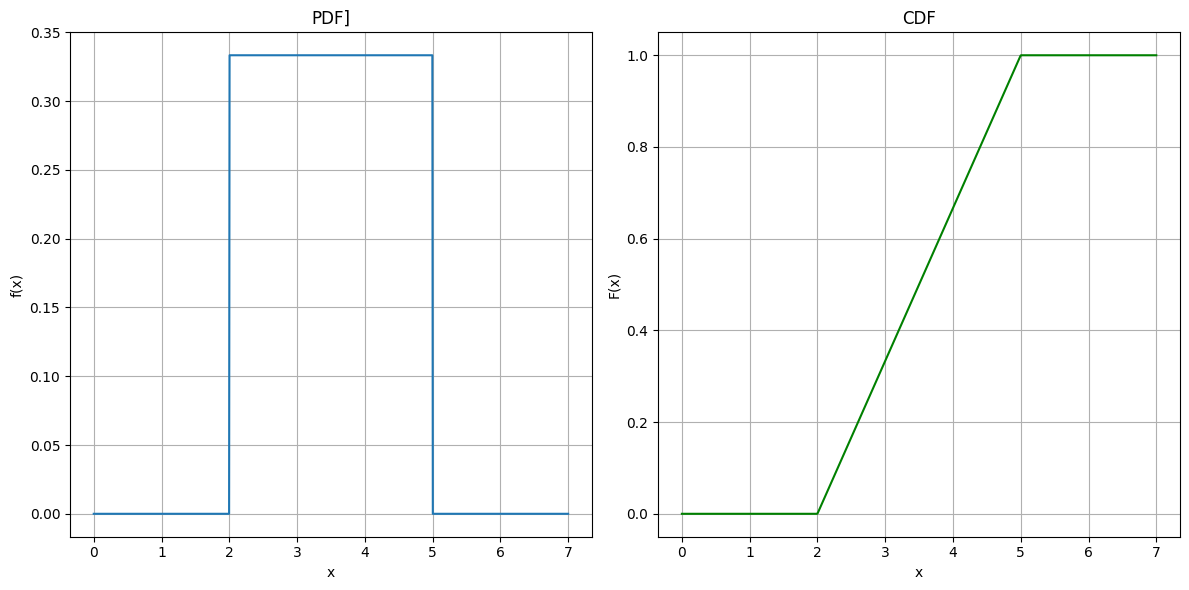

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(x, pdf)
axs[0].set_title('PDF]')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid(True)

axs[1].plot(x, cdf, 'green')
axs[1].set_title('CDF')
axs[1].set_xlabel('x')
axs[1].set_ylabel('F(x)')
axs[1].grid(True) 

plt.tight_layout()
plt.show()

#### Q2. (Optional)
#### Compute Theoretical Moments:
   Calculate the theoretical mean and variance for a Uniform(a, b) random variable with a = 2 and b = 5 using the formulas from the slide.  

In [97]:
def theo_mean(a, b):
    return (a+b)/2

def theo_variance(a, b):
    return ((b-a)**2)/12

In [98]:
a = 2
b = 5

print(f"Theoretical mean: {theo_mean(a, b)}")
print(f"Theoretical variance: {theo_variance(a, b)}")

Theoretical mean: 3.5
Theoretical variance: 0.75


#### Q3. (Optional)
#### Probability Calculation Using CDF:  
   For X ∼ Uniform(2, 5), compute P[3 ≤ X ≤ 4] using the CDF approach described in the slide.  

In [99]:
a = 2
b = 5 
dist = torch.distributions.Uniform(a, b)

cdf_3 = dist.cdf(torch.tensor(3.0))
cdf_4 = dist.cdf(torch.tensor(4.0))

probability = cdf_4 - cdf_3
print(f"P(3 ≤ X ≤ 4) = {probability.item():.4f}")

P(3 ≤ X ≤ 4) = 0.3333


# 15. **Exponential Random Variables**  
*(Refer https://probability4datascience.com/slides/Slide_4_06.pdf)*


#### Q1. (**Mandatory**)
#### Simulate and Overlay Theoretical PDF:  
   Simulate 1000 samples from an Exponential (λ = 0.5) distribution, then plot a histogram of the samples with the theoretical PDF overlay.

In [100]:
lambda_ = 0.5

exp_dist = torch.distributions.Exponential(lambda_)
samples = exp_dist.sample((100000,))

def exponential_pdf(x, lambd):
    return lambd * torch.exp(-lambd * x)

x_values = torch.linspace(0, 15, 1000000)
pdf_values = exponential_pdf(x_values, lambda_)

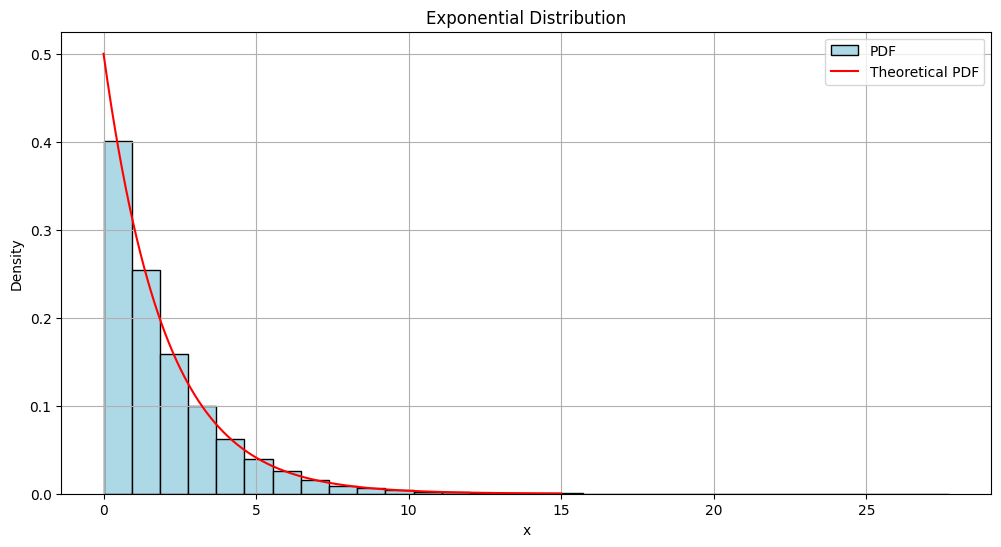

In [101]:
plt.figure(figsize=(12, 6))

plt.hist(samples, bins=30, color='lightblue', edgecolor='black', density=True, label='PDF')
plt.plot(x_values, pdf_values, color='red', label = 'Theoretical PDF')

plt.title('Exponential Distribution')
plt.xlabel('x')
plt.ylabel('Density')

plt.legend()
plt.grid(True)
plt.show()

#### Q2. (Optional)
#### Theoretical Mean and Variance:  
   Using the formulas from the slide, compute the theoretical mean and variance for an Exponential distribution with λ = 0.5.  

In [102]:
def theo_mean_exponential(lambd):
    return 1/lambd

def theo_variance_exponetial(lambd):
    return 1/(lambd**2)

In [103]:
lambda_ = 0.5

print(f"Theoretical mean: {theo_mean_exponential(lambda_)}")
print(f"Theoretical variance: {theo_variance_exponetial(lambda_)}")

Theoretical mean: 2.0
Theoretical variance: 4.0


#### Q3. (Optional)
#### Compute Tail Probability:  
   For an Exponential(λ = 0.5) random variable, calculate P[T > 3] using the survival function (i.e. 1 – CDF) as derived in the slide.  

In [104]:
lambda_ = 0.5

exp_dist = torch.distributions.Exponential(rate=lambda_)
cdf_3 = exp_dist.cdf(torch.tensor(3))

prob = 1 - cdf_3
print(f"P(T > 3) = {prob:.4f}")


P(T > 3) = 0.2231


# 16. **Gaussian Random Variables**

#### Q1. (**Mandatory**)
The PDF of a Gaussian random variable $ X \sim \mathcal{N}(\mu, \sigma^2) $ is given by:

 $$
 f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right).
 $$
1. Use `torch.distributions`, generate 100 random samples from a Gaussian distribution with a mean of 3 and a standard deviation of 2.
2. Plot a histogram of the samples and calculate the sample mean and variance of the distribution.
3. Repeat this process for sample sizes of 10000 and 1000000.

Observe how the shape of the histogram changes as the sample size increases. What patterns or trends do you notice in the calculated sample mean and variance?

In [105]:
def simulate_gaussian(mu, sigma, size):
    dist = torch.distributions.Normal(mu, sigma).sample((size,))

    sample_mean = torch.mean(dist).item()
    sample_variance = torch.var(dist).item()

    plt.figure(figsize=(8, 4))
    plt.hist(dist, bins=50, color='lightblue', edgecolor='black')

    plt.title(f"Sample Size: {size}\nMean: {sample_mean:.4f}, Variance: {sample_variance:.4f}")
    plt.xlabel('x')
    plt.ylabel('Density')

    plt.grid(True)
    plt.show()

In [106]:
mu = 3
sigma = 2

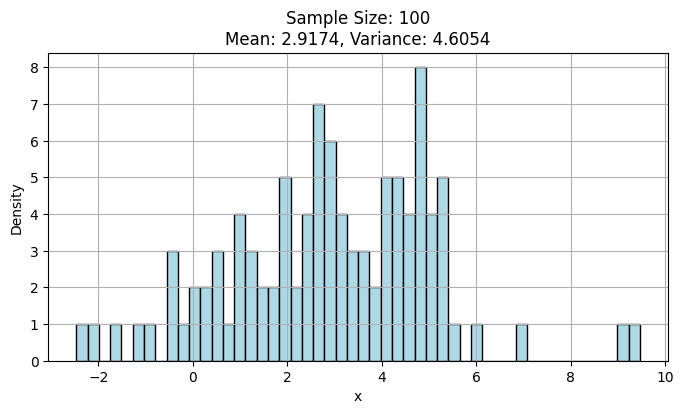

In [107]:
simulate_gaussian(mu, sigma, 100)

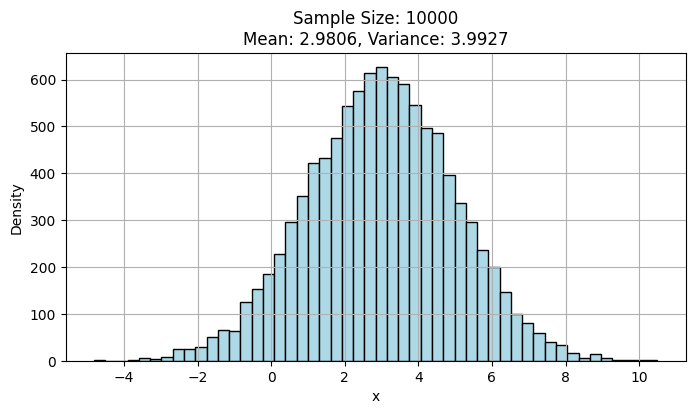

In [108]:
simulate_gaussian(mu, sigma, 10000)

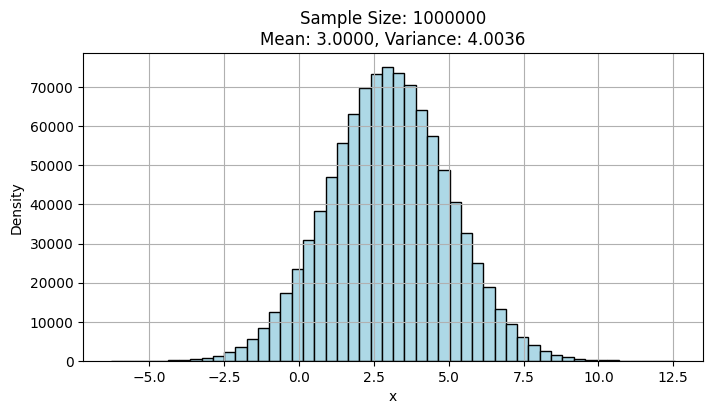

In [109]:
simulate_gaussian(mu, sigma, 1000000)

#### Q2. (Optional)
Let $ X \sim \mathcal{N}(0,1) $ be a standard Gaussian random variable. Define a new random
variable $ Y = 4X + 10 $. What is the distribution of $ Y $? Verify your answer by ploting histogram of random variable $Y$. You can use `torch.distributions` for generating samples for Gaussian random vairable.

The distribution of Y will also be Gaussian and will be:

$ Y \sim \mathcal{N}(10,16) $

In [110]:
mu_x = 0
sigma_x = 1

X = torch.distributions.Normal(mu_x, sigma_x).sample((1000000,))
Y = 4 * X + 10

x = torch.linspace(-10, 25, 1000000)
dist = torch.distributions.Normal(10, 4)

pdf = torch.exp(dist.log_prob(x))

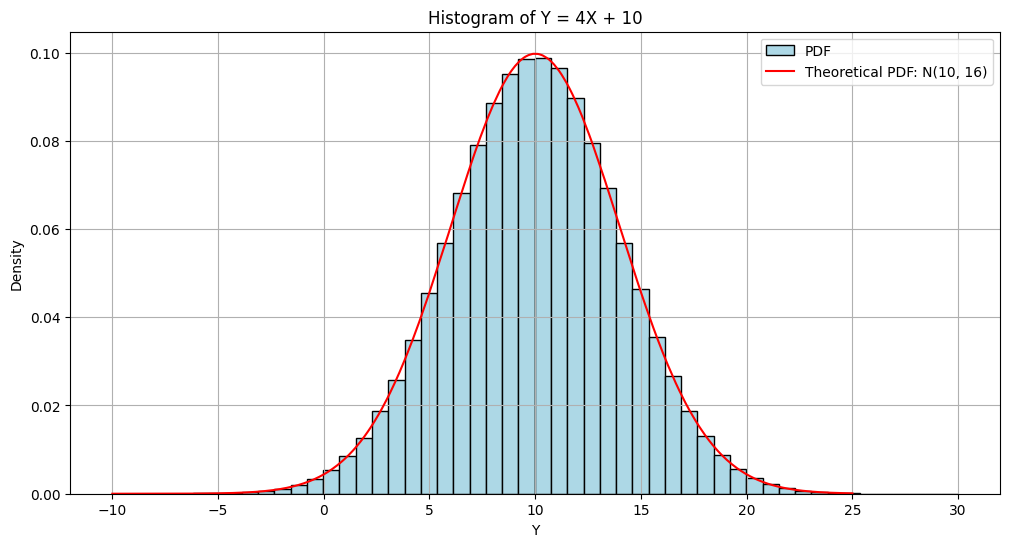

In [111]:
plt.figure(figsize=(12, 6))

plt.hist(Y, bins=50, color='lightblue', edgecolor='black', density=True, label='PDF')
plt.plot(x, pdf, color='red', label='Theoretical PDF: N(10, 16)')

plt.title(f"Histogram of Y = 4X + 10")
plt.xlabel('Y')
plt.ylabel('Density')

plt.legend()
plt.grid(True)
plt.show()

#### Q3. (Optional)

Let $X \sim \mathcal{N}(\mu_1, \sigma_1^2)$ with $\mu_1 = 3$ and $\sigma_1 = 2$, and let
$Y \sim \mathcal{N}(\mu_2, \sigma_2^2)$ with $\mu_2 = -1$ and $\sigma_2 = 1$. Define a new random variable
$Z = X + Y$.
1. Determine the theoretical mean and variance of Z. Write this in a markdown cell.
2. Verify the theoretical mean and variance that you get by generating 10,000 samples for 𝑋 and 𝑌 using `torch.distributions` and computing their sum to get 𝑍. Print the empirical mean and variance of 𝑍.
3. Plot histogram of the distribution of random variable 𝑍.

### **CALCULATIONS**

$X \sim \mathcal{N}(\mu_1, \sigma_1^2)$, and $Y \sim \mathcal{N}(\mu_2, \sigma_2^2)$  

  
$Z = X + Y \sim \mathcal{N}(\mu_Z, \sigma_Z^2)$  

- **Mean of $Z$:**
$$
\mu_Z = \mu_1 + \mu_2
$$

- **Variance of $Z$:**
$$
\sigma_Z^2 = \sigma_1^2 + \sigma_2^2
$$



##### **Given**:
$\mu_1 = 3$, $\mu_2 = -1$  

$$
\mu_Z = 3 + (-1) = 2
$$

$\sigma_1^2 = 4$, $\sigma_2^2 = 1$  

$$
\sigma_Z^2 = 4 + 1 = 5
$$

Thus:  
$$
Z \sim \mathcal{N}(2, 5)
$$


In [112]:
mu1, sigma1 = 3, 2
mu2, sigma2 = -1, 1

X = torch.distributions.Normal(mu1, sigma1).sample((100000,))
Y = torch.distributions.Normal(mu2, sigma2).sample((100000,))
Z = X + Y

z = torch.linspace(-5, 10, 100000)
theoretical_dist_z = torch.distributions.Normal(2, torch.sqrt(torch.tensor(5.0)))
pdf = torch.exp(theoretical_dist_z.log_prob(z))

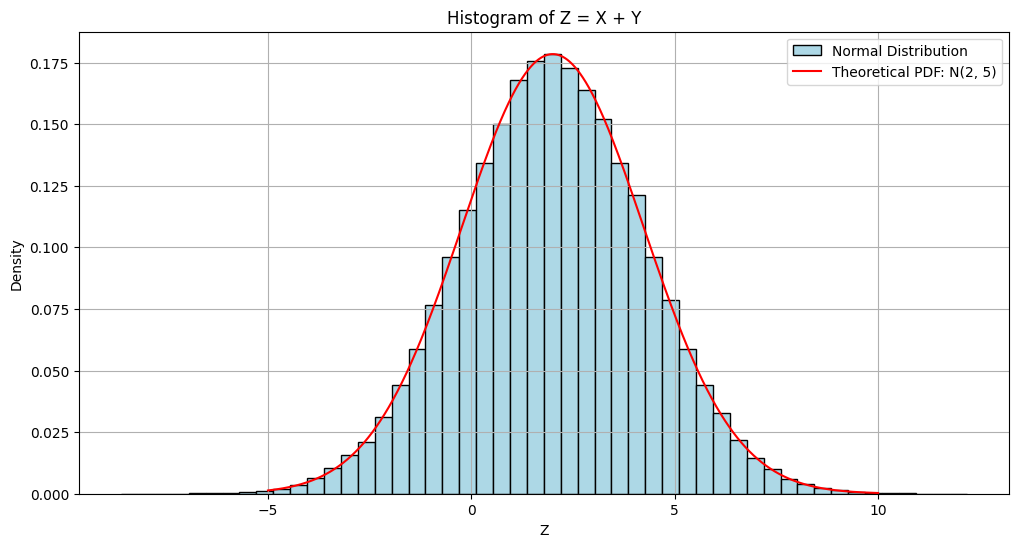

In [113]:
plt.figure(figsize=(12, 6))

plt.hist(Z.numpy(), bins=50, color='lightblue', edgecolor='black', density=True, label='Normal Distribution')
plt.plot(z, pdf, color='red', label='Theoretical PDF: N(2, 5)')

plt.title(f"Histogram of Z = X + Y")
plt.xlabel('Z')
plt.ylabel('Density')

plt.legend()
plt.grid(True)
plt.show()

# 17. **Transformation of random Variables**

#### Q1. (**Mandatory**)
Write a function that performs the following tasks:

1. Generate 10,000 samples from a uniform distribution in the range [0, 1].
2. Apply a linear transformation Y = 2X + 3 to the generated samples.
3. Plot the histogram of the original samples and the transformed samples side by side.
4. Calculate and print the mean and variance of both the original and transformed distributions.

In [114]:
X = torch.distributions.Uniform(0, 1).sample((100000,))
Y = 2 * x + 3

original_mean = torch.mean(X)
original_variance = torch.var(X)

transformed_mean = torch.mean(Y)
transformed_variance = torch.var(Y)

print(f"Original Distribution -> Mean: {original_mean:.4f}, Variance: {original_variance:.4f}")
print(f"Transformed Distribution -> Mean: {transformed_mean:.4f}, Variance: {transformed_variance:.4f}")


Original Distribution -> Mean: 0.5004, Variance: 0.0832
Transformed Distribution -> Mean: 18.0000, Variance: 408.3346


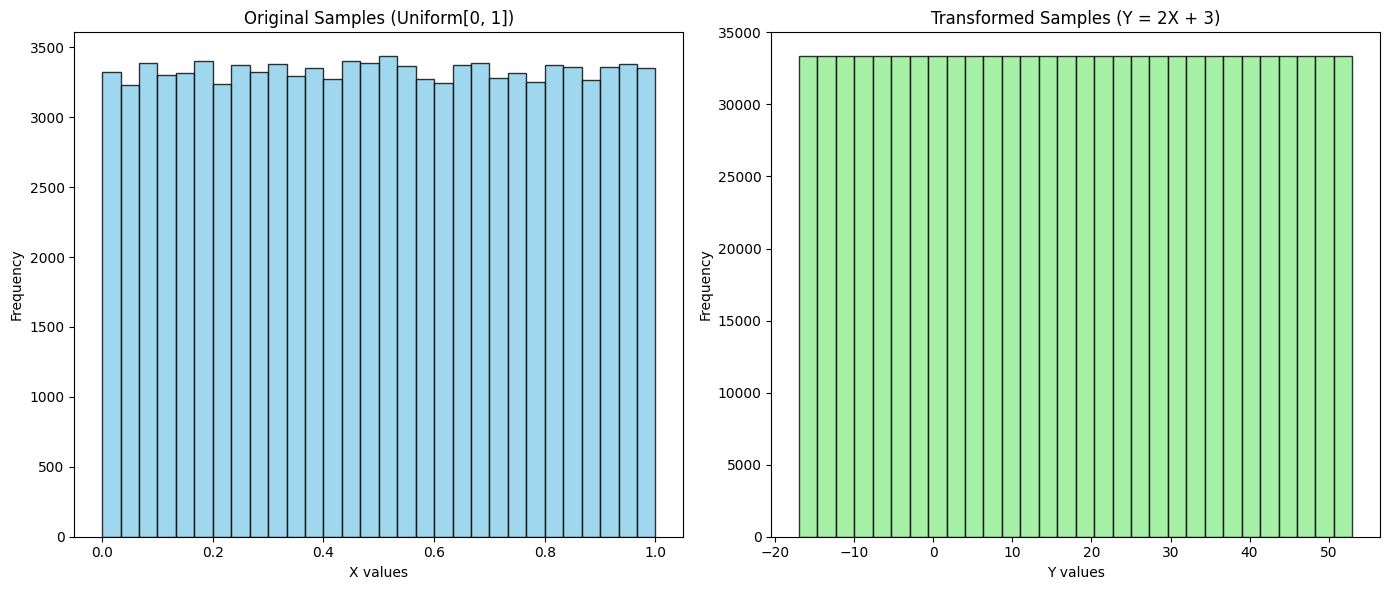

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(X, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Original Samples (Uniform[0, 1])')
axes[0].set_xlabel('X values')
axes[0].set_ylabel('Frequency')

axes[1].hist(Y, bins=30, color='lightgreen', edgecolor='black', alpha=0.8)
axes[1].set_title('Transformed Samples (Y = 2X + 3)')
axes[1].set_xlabel('Y values')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Q2. (Optional)
Let X be a continuous random variable following a Uniform(0,1) distribution. Define a new random variable: Y=−ln(X)

(a). Generate 10,000 samples of **X** and compute **Y**.

(b). Plot the histogram of **Y**, and compare it with the probability density function (PDF) of an exponential distribution with parameter λ=1/2.

In [116]:
lambda_ = 0.5

X = torch.distributions.Uniform(0, 1).sample((100000,))
Y = -torch.log(X)

x = torch.linspace(0, 10, 100000)
pdf_exponential = lambda_ * torch.exp(-lambda_ * x)

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1012\3687594927.py:4: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x, pdf_exponential, color='red', label='Theoretical PDF: $\lambda = 0.5$')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1012\3687594927.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.title('PDF of Y = -ln(X) and Exponential ($\lambda = 0.5$)')


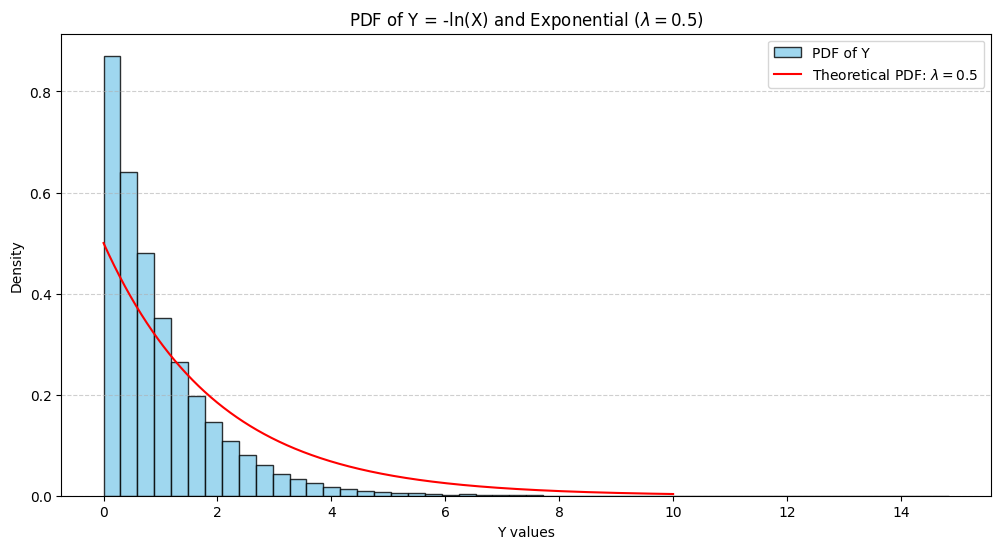

In [117]:
plt.figure(figsize=(12, 6))
plt.hist(Y, bins=50, color='skyblue', edgecolor='black', alpha=0.8, density=True, label='PDF of Y')

plt.plot(x, pdf_exponential, color='red', label='Theoretical PDF: $\lambda = 0.5$')

plt.title('PDF of Y = -ln(X) and Exponential ($\lambda = 0.5$)')
plt.xlabel('Y values')
plt.ylabel('Density')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)    
plt.show()

#### Q3. (Optional)
Combined Transformation Involving a Logarithmic Function

Let $X \sim \mathcal{N}(0,1)$ and define a new random variable $Z = \ln(|X| + 1)$.

1. Use `torch.distributions` to simulate 10,000 samples of $X$, compute $Z$, and estimate its empirical distribution.
2. Plot the histogram of $Z$ and compare it with the histogram of $X$.

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\l'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1012\845640112.py:7: SyntaxWarning: invalid escape sequence '\s'
  axes[0].set_title('PDF of $X \sim \mathcal{N}(0, 1)$')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1012\845640112.py:12: SyntaxWarning: invalid escape sequence '\l'
  axes[1].set_title('PDF of $Z = \ln(|X| + 1)$')


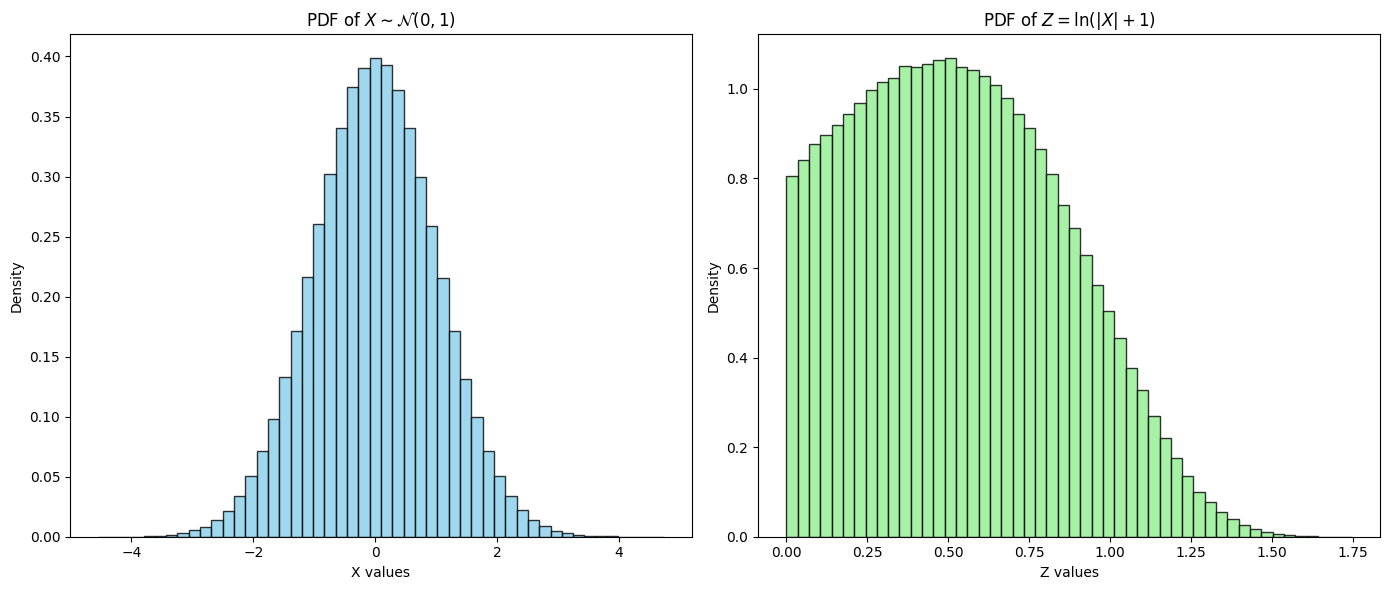

In [118]:
X = torch.distributions.Normal(0, 1).sample((1000000,))
Z = torch.log(torch.abs(X) + 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(X.numpy(), bins=50, color='skyblue', edgecolor='black', alpha=0.8, density=True)
axes[0].set_title('PDF of $X \sim \mathcal{N}(0, 1)$')
axes[0].set_xlabel('X values')
axes[0].set_ylabel('Density')

axes[1].hist(Z.numpy(), bins=50, color='lightgreen', edgecolor='black', alpha=0.8, density=True)
axes[1].set_title('PDF of $Z = \ln(|X| + 1)$')
axes[1].set_xlabel('Z values')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# 18. **Generating Random Numbers**

#### Q1. (**Mandatory**)

(a) Generate 10,000 samples from a uniform distribution U(0,1).

(b) Transform these samples to generate exponential random variables with parameter λ = 2.

(c) Plot a histogram of the generated exponential random variables.

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1012\1173834881.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.title("PMF of Uniform transformed to Exponential ($\lambda = 0.5$)")


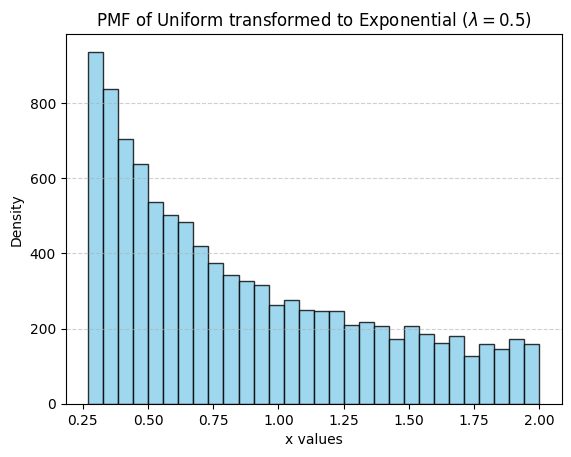

In [119]:
lambda_ = 2

X = torch.distributions.Uniform(0, 1).sample((10000,))
Y = lambda_ * torch.exp(- lambda_ * X)

plt.hist(Y, bins=30, color='skyblue', edgecolor='black', alpha=0.8)

plt.title("PMF of Uniform transformed to Exponential ($\lambda = 0.5$)")
plt.xlabel("x values")
plt.ylabel("Density")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Q2. (Optional)
Given an exponential distribution with rate parameter λ=3.

write a Python function that:

(a) Generates a single exponential random variable using inverse transform sampling.
Uses the transformation X=− 1/λ ln(1−U), where U is a uniform random number between 0 and 1 and returns the generated exponential random variable.

In [120]:
def inverse_transform_exponential(lambd):
    U = torch.distributions.Uniform(0, 1).sample()
    X = -torch.log(1 - U) / lambd
    return X

In [121]:
lambda_ = 3
exp_sample = inverse_transform_exponential(lambda_)

print(f"Exponential random variable (λ={lambda_}): {exp_sample:.4f}")

Exponential random variable (λ=3): 0.2647


#### Q3. (Optional)
 Write a Python function that:

(a). Generates N random samples from a uniform distribution U(0,1) and transforms the samples into exponential random variables with rate λ=5 using inverse transform sampling.

(b) Apply a nonlinear transformation Z = X² to each generated exponential random variable X.

(c) Calculates and returns the following:

    (a) The proportion of values in Z that exceed a threshold t (provided as a function parameter).

    (b) The sample mean and sample variance of both X and Z.

In [122]:
def exponential_transformation(N, lam, t):
    U = torch.distributions.Uniform(0, 1).sample((N,))
    X = -torch.log(1 - U) / lam

    Z = X ** 2

    proportion = (Z > t).float().mean().item()

    mean_x = X.mean().item()
    var_x = X.var().item()
    
    mean_z = Z.mean().item()
    var_z = Z.var().item()

    return {
        "proportion_above_t": proportion,
        "mean_x": mean_x,
        "var_x": var_x,
        "mean_z": mean_z,
        "var_z": var_z
    }

In [123]:
N = 10000
lam = 5
t = 0.5

In [124]:
result = exponential_transformation(N, lam, t)

print("\nResults:")
print(f"Proportion of Z > {t}: {result['proportion_above_t']:.4f}")
print(f"Mean of X: {result['mean_x']:.4f}, Variance of X: {result['var_x']:.4f}")
print(f"Mean of Z: {result['mean_z']:.4f}, Variance of Z: {result['var_z']:.4f}")


Results:
Proportion of Z > 0.5: 0.0308
Mean of X: 0.2011, Variance of X: 0.0398
Mean of Z: 0.0803, Variance of Z: 0.0294
